# Analysis the Burned Area Dataset

by Xikun Hu



## Imoprt the libs, set the data cube, regional area and time period

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from numpy import datetime64
from ipywidgets import interact 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.simplefilter('ignore')
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm

In [ ]:
xr.show_versions()

In [2]:
ESDC_img = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-1x720x1440-2.0.0.zarr")

In [3]:
ESDC_time = xr.open_zarr("/home/jovyan/work/datacube/ESDCv2.0.0/esdc-8d-0.25deg-184x90x90-2.0.0.zarr")

In [4]:
ESDC_img = ESDC_img.burnt_area

In [5]:
Europe = ESDC_img.sel(lat = slice(70.,30.), lon = slice(-20.,35.))

In [29]:
## time series from 2000 to 2015
Europe = Europe.sel(time = slice('1995-08-01','2014-07-30'))

## First methof to sum the time dimension based on Xarray

In [7]:
%time Europe_BA_time = Europe.sum(dim='time').compute()

CPU times: user 4.26 s, sys: 1.28 s, total: 5.54 s
Wall time: 2.34 s


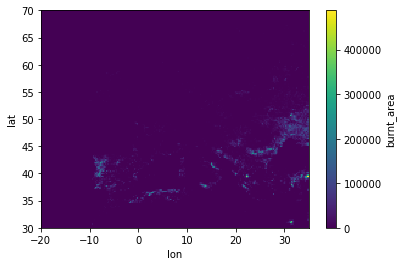

In [8]:
# from matplotlib.colors import LogNorm
plt.figure()
Europe_BA_time.plot()
# plt.savefig('Sum_API_time_dimension.png', dpi = 500,bbox_inches='tight')

## Get the one dimensional value for Burned Area based on Numpy

In [30]:
Europe_1 = Europe.values

In [38]:
sum_axis_0_BA = np.nansum(Europe_1, axis=0)

In [40]:
# total burned area 
tba = sum_axis_0_BA.sum().sum()
tba

85667740.0

In [ ]:
# plt.imshow(sum_axis_0_BA_thre)

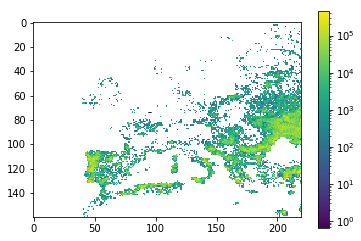

In [39]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
plt.show()
# plt.savefig('BA_sum_all_years_logNorm.png', dpi=500, bbox_inches='tight')

In [41]:
# get the threshold value over than 10 000
sum_axis_0_BA_thre = (sum_axis_0_BA > 10000) * sum_axis_0_BA
# sum_axis_0_BA_thre.shape

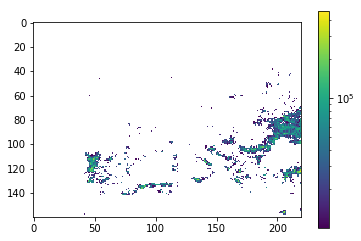

In [42]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA_thre, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
plt.show()
# plt.savefig('BA_sum_all_years_logNorm_10000Thre.png', dpi=500, bbox_inches='tight')

[30, 60, 140, 100]

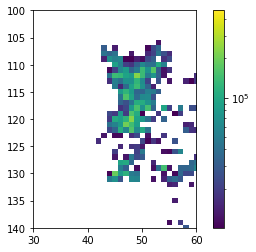

In [44]:
from matplotlib.colors import LogNorm
plt.figure()
plt.imshow(sum_axis_0_BA_thre, norm=LogNorm()) # show the value as logNorm
# plt.imshow(sum_axis_0_BA)
plt.colorbar()
# plt.show()
plt.axis([30, 60, 140, 100])
# plt.savefig('BA_sum_all_years_logNorm_1000Thre_Region_30_60_140_100.png', dpi=500, bbox_inches='tight')

# Spatial Analysis for based on the suitable study area

In [46]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-30'))
BA_year = Europe_study_area_year.groupby('time.year').sum(dim='time')

In [47]:
BA_year_value = BA_year.values
BA_year_value_sum = np.sum(BA_year_value, axis = 1)
BA_year_value_sum = np.sum(BA_year_value_sum, axis = 1)

In [48]:
BA_year_value_sum

array([1.49061987e+03, 6.86568375e+05, 6.69763500e+05, 8.92133312e+05,
       6.14431562e+05, 1.03054244e+06, 4.19960656e+05, 4.81474219e+05,
       2.12947175e+06, 7.78531375e+05, 1.61631462e+06, 7.45297562e+05,
       1.25357766e+05, 8.28714844e+04, 3.47568531e+05, 5.36966500e+05,
       3.61186062e+05, 5.11173750e+05, 7.43015000e+05, 0.00000000e+00],
      dtype=float32)

In [ ]:
# BA_year.plot.imshow(x='lon',y='lat',col='year',col_wrap=5)

<Figure size 432x288 with 0 Axes>

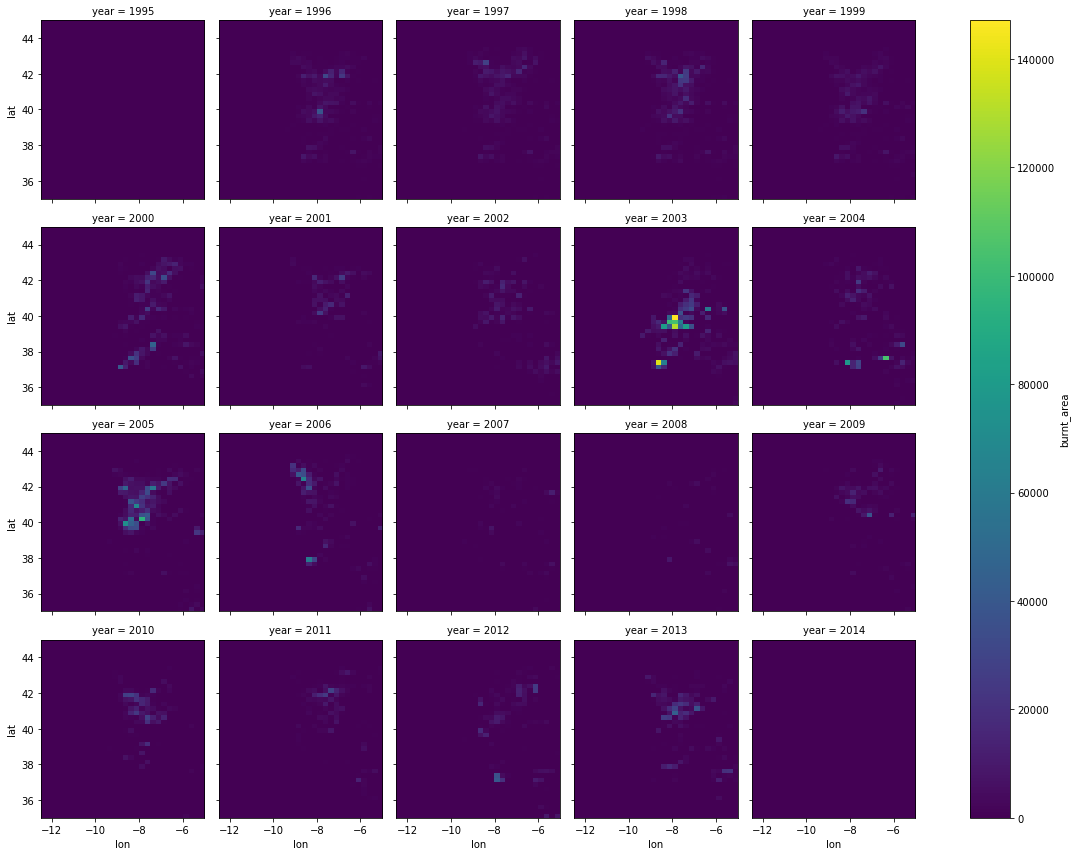

In [49]:
plt.figure()
BA_year.plot.imshow(x='lon',y='lat',col='year',col_wrap=5)
# plt.savefig('Portugal_BA_group_Year.png', dpi = 500,bbox_inches='tight')

In [ ]:
## find the year of burned area
# 2003

In [50]:
Europe_study_area_selected_year = Europe_study_area.sel(time=slice('2003-01-01', '2003-12-31'))
BA_month = Europe_study_area_selected_year.groupby('time.month').sum(dim='time')

In [51]:
BA_month_value = BA_month.values
BA_month_value_sum = np.sum(BA_month_value, axis = 1)
BA_month_value_sum = np.sum(BA_month_value_sum, axis = 1)
BA_month_value_sum

array([      0.    ,       0.    ,    5672.509 ,    4169.332 ,
          4908.9326,   46387.395 ,  118712.73  , 1496822.4   ,
        349098.97  ,  101689.914 ,    2009.6625,       0.    ],
      dtype=float32)

<Figure size 432x288 with 0 Axes>

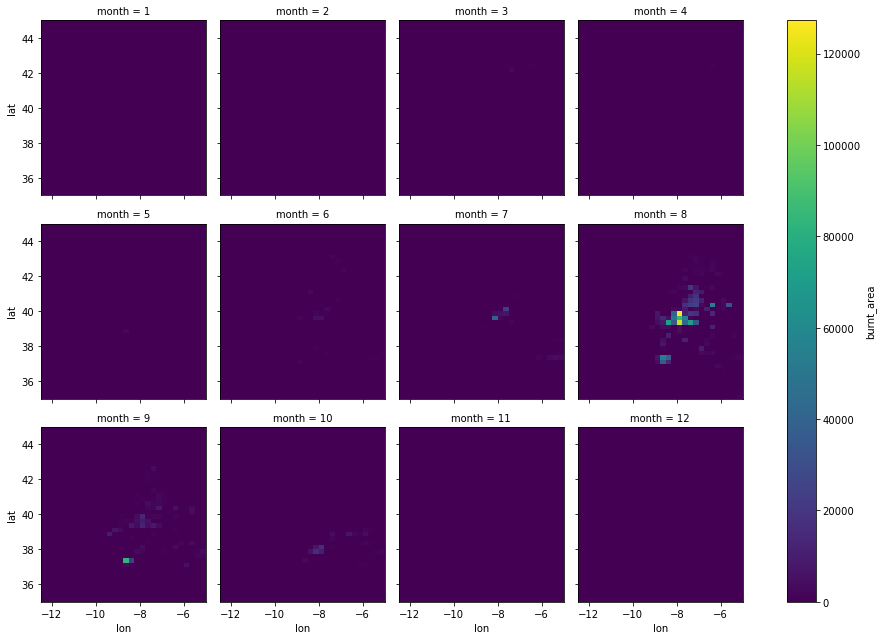

In [52]:
plt.figure()
BA_month.plot.imshow(x='lon',y='lat',col='month',col_wrap=4)
# plt.savefig('Portugal_BA_group_Month.png', dpi = 500,bbox_inches='tight')

In [53]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_selected_month = Europe_study_area.sel(time=slice('2003-08-01', '2003-08-30'))
# BA_week = Europe_study_area_selected_month.burnt_area.groupby('time.week').sum(dim='time')

In [ ]:
# Europe_study_area_selected_month

In [60]:
# Europe_BA_time_month_sum = Europe_study_area_selected_month.mean(dim='time').compute()
BA_week = Europe_study_area_selected_month.groupby('time.week').sum(dim='time')

<Figure size 432x288 with 0 Axes>

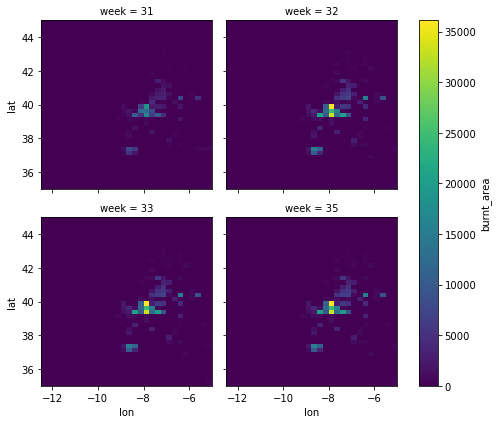

In [61]:
plt.figure()
BA_week.plot.imshow(x='lon',y='lat',col='week',col_wrap=2)
# plt.savefig('Portugal_BA_group_week.png', dpi = 500,bbox_inches='tight')

## Time Series Analysis for burnt area in 1D

In [4]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-24'))
BA_ts = Europe_study_area_year.burnt_area

In [ ]:
# BA_ts

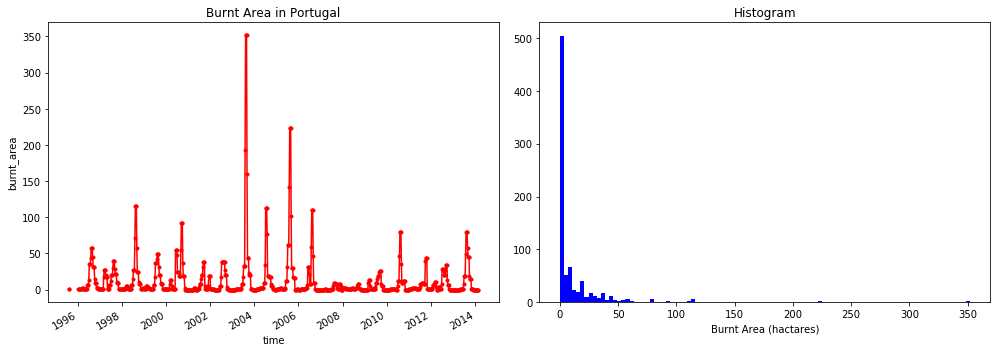

In [5]:
BA_ts_mean = BA_ts.mean(dim='lon').mean(dim='lat')
fig, ax = plt.subplots(figsize = [14,5], ncols=2)

BA_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
ax[0].set_title("Burnt Area in Portugal")
BA_ts_mean.plot.hist(ax = ax[1], color ='blue',bins = 100)
ax[1].set_xlabel("Burnt Area (hactares)")
plt.tight_layout()
# plt.savefig('Portugal_BA_TS.png', dpi = 500,bbox_inches='tight')

## Temperature and Precipitation Analysis

In [6]:
Europe_study_area = ESDC_img.sel(lat = slice(45.,35.), lon = slice(-12.5,-5.))
Europe_study_area_year = Europe_study_area.sel(time = slice('1995-08-01','2014-07-24'))
Pre_ts = Europe_study_area_year.precipitation
Tem_ts = Europe_study_area_year.air_temperature_2m
CE_ts = Europe_study_area_year.c_emissions

In [7]:
BA_ts_mean = BA_ts.mean(dim='lon').mean(dim='lat')
Pre_ts_mean = Pre_ts.mean(dim='lon').mean(dim='lat')
Tem_ts_mean = Tem_ts.mean(dim='lon').mean(dim='lat')
CE_ts_mean = CE_ts.mean(dim='lon').mean(dim='lat')

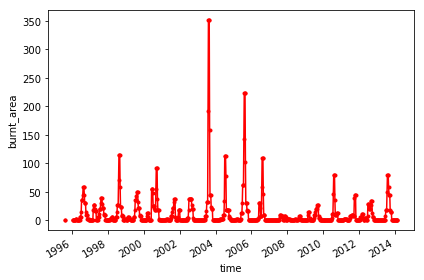

In [9]:
BA_ts_mean.plot(color ='red', marker ='.')

# ax[1].set_ylabel("Burnt Area (hactares)")
plt.tight_layout()

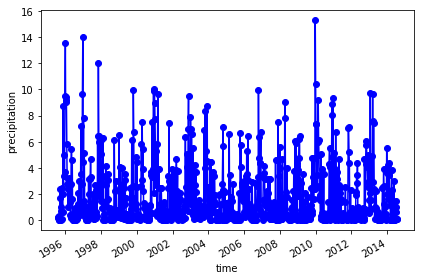

In [10]:
Pre_ts_mean.plot(color ='blue', marker ='o')

# ax[1].set_ylabel("Burnt Area (hactares)")
plt.tight_layout()

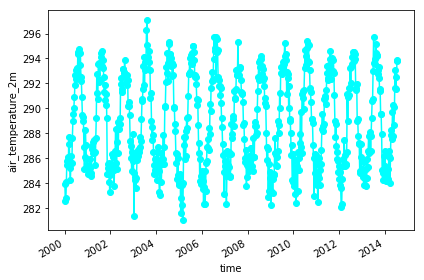

In [11]:
# fig = plt.subplots(figsize = [14,])

# BA_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
# ax[0].set_title("Burnt Area in Portugal")
# Pre_ts_mean.plot(ax = ax[1], color ='blue', marker ='*')
Tem_ts_mean.plot(color ='cyan', marker ='o')

# ax[1].set_ylabel("Burnt Area (hactares)")
plt.tight_layout()
# plt.savefig('Portugal_Tem_TS.png', dpi = 500,bbox_inches='tight')

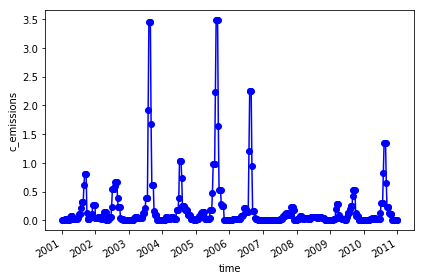

In [13]:

# LE_ts_mean = LE_ts.mean(dim='lon').mean(dim='lat')

# fig, ax = plt.subplots(figsize = [14,7], nrows=1)

# ST_ts_mean.plot(ax = ax[0], color ='red', marker ='.')
# ax[0].set_title("Burnt Area in Portugal")
CE_ts_mean.plot(color ='blue', marker = 'o')
# ax[1].set_xlabel("Burnt Area (hactares)")
plt.tight_layout()
# plt.savefig('Portugal_CE_TS.png', dpi = 500,bbox_inches='tight')